In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import joblib
from sklearn.utils import shuffle

In [20]:
file_path = 'data/raw/creditcard_2023.csv'
df = pd.read_csv(file_path).drop(columns=['id']).dropna()
df = shuffle(df)
df = df.reset_index(drop=True)

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.906409,-0.778194,-0.070237,-1.304189,0.214919,0.306562,0.277640,-0.181593,0.119960,1.125153,...,0.081226,1.159525,-0.122638,0.325016,0.313886,0.146423,-0.298505,-0.264953,16237.05,0
1,-0.789265,-0.552857,-0.027642,-2.143462,0.756626,0.760031,0.179347,0.208731,-0.241051,0.751996,...,-0.039317,0.673461,-0.724156,-1.399058,1.876615,0.270871,-0.222962,-0.522283,4784.43,0
2,0.909633,-0.615014,0.321066,-0.530522,0.975265,2.486253,0.123554,0.104894,1.003178,0.529648,...,-0.136065,-0.320693,-0.114162,2.230173,0.841508,-0.970136,-0.163731,-0.000255,8299.76,0
3,1.056051,-0.380402,0.571211,-0.487959,0.252055,0.365181,0.416899,-0.155936,0.387329,0.641589,...,-0.208367,-0.716364,-0.003305,-0.843590,0.417796,0.300822,-0.274909,-0.098318,18646.13,0
4,-0.765730,0.440482,0.038668,0.485665,-0.331725,0.632844,0.135880,-0.770042,2.571246,0.984920,...,0.512723,-0.103687,0.160874,0.917847,-0.850540,-0.952398,-2.581062,-1.544571,7625.62,1


In [22]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-2.819029e-17,-5.445624e-17,7.767324e-17,-2.841521e-17,1.249570e-19,1.696915e-17,1.979318e-17,1.466995e-17,2.923993e-17,1.505981e-16,...,1.182093e-17,-2.499139e-19,6.735180e-18,-1.337352e-17,-3.428819e-17,-6.247848e-19,-1.869356e-17,3.218266e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


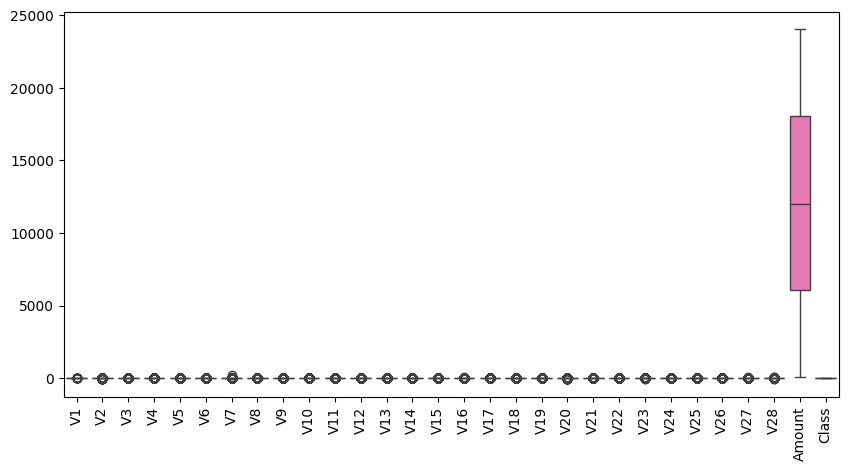

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour identifier les valeurs aberrantes
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [25]:
print(df['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


In [26]:
print(df.isnull().sum())


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
print(f"Number of duplicate rows before: {df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"Number of duplicate rows after: {df.duplicated().sum()}")

Number of duplicate rows before: 1
Number of duplicate rows after: 0


In [4]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Class' in num_features:
    num_features.remove('Class')

In [5]:
# Compute Winsorization Bounds Before Applying
winsorization_bounds = {}
for col in num_features:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    winsorization_bounds[col] = (lower, upper)

# Save Winsorization Bounds
joblib.dump(winsorization_bounds, "models/winsorization_bounds.pkl")

# Apply Winsorization Using Saved Bounds
for col, (lower, upper) in winsorization_bounds.items():
    df[col] = df[col].clip(lower=lower, upper=upper)


In [6]:
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

df = df.drop_duplicates()

# Save the Trained Scaler
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [7]:

# Split Data
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save processed data to CSV
X_train.to_csv('data/processed/X_train.csv', index=False)
X_test.to_csv('data/processed/X_test.csv', index=False)
y_train.to_csv('data/processed/y_train.csv', index=False)
y_test.to_csv('data/processed/y_test.csv', index=False)

In [8]:
# # Apply SMOTE for Class Imbalance
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled = X_train
y_train_resampled =  y_train

In [9]:
# Build and Train XGBoost Model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Make Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.9997
Precision: 0.9995
Recall: 1.0000
F1 Score: 0.9997
ROC AUC Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       1.00      1.00      1.00     56850

    accuracy                           1.00    113699
   macro avg       1.00      1.00      1.00    113699
weighted avg       1.00      1.00      1.00    113699

Confusion Matrix:
 [[56819    30]
 [    0 56850]]


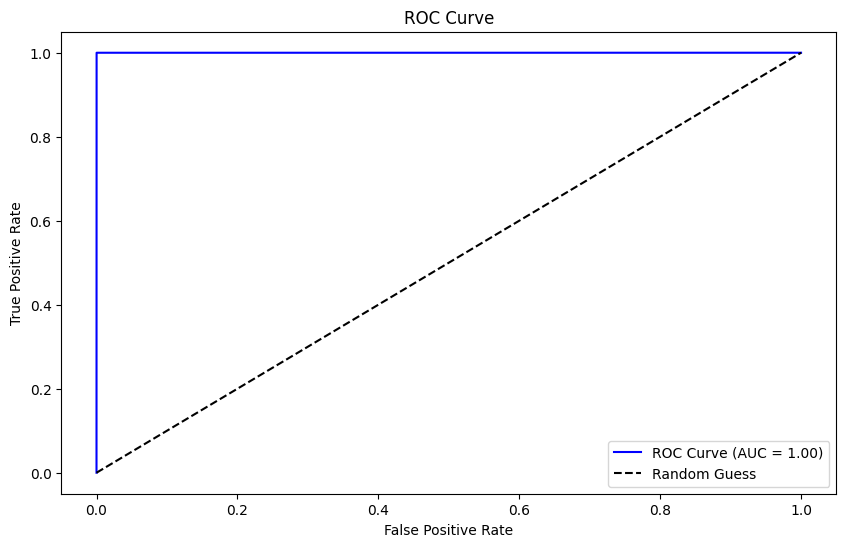

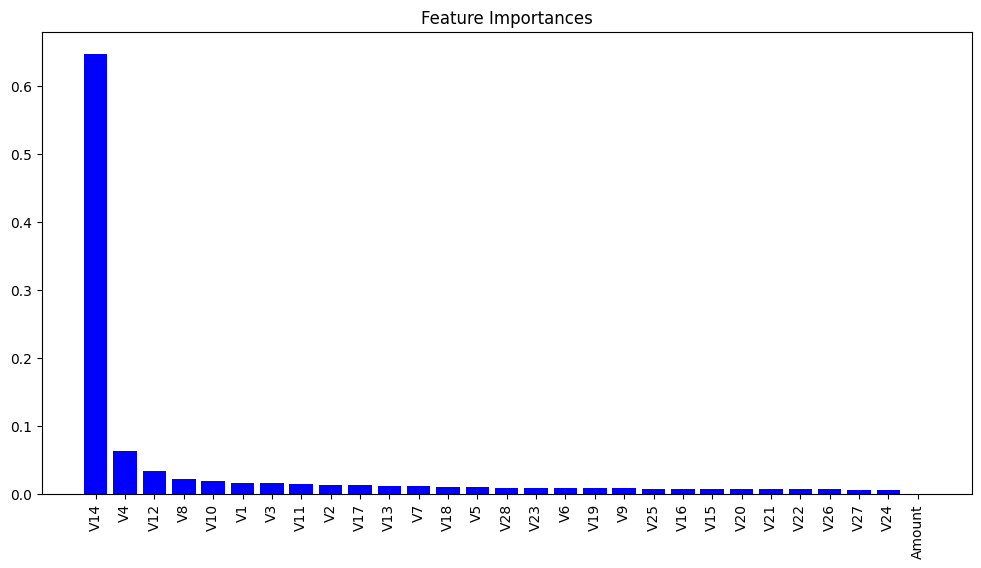

In [10]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
sorted_features = X_train.columns[np.argsort(importances)[::-1]]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(sorted_features, importances[np.argsort(importances)[::-1]], color='blue')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Save the trained model
model_filename = 'models/XGBClassifier.pkl'
joblib.dump(model, model_filename)
print(f'Model saved to {model_filename}')

Model saved to models/XGBClassifier.pkl


Accuracy: 0.9997
Precision: 0.9995
Recall: 1.0000
F1 Score: 0.9997
ROC AUC Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       1.00      1.00      1.00     56850

    accuracy                           1.00    113699
   macro avg       1.00      1.00      1.00    113699
weighted avg       1.00      1.00      1.00    113699

Confusion Matrix:
 [[56819    30]
 [    0 56850]]


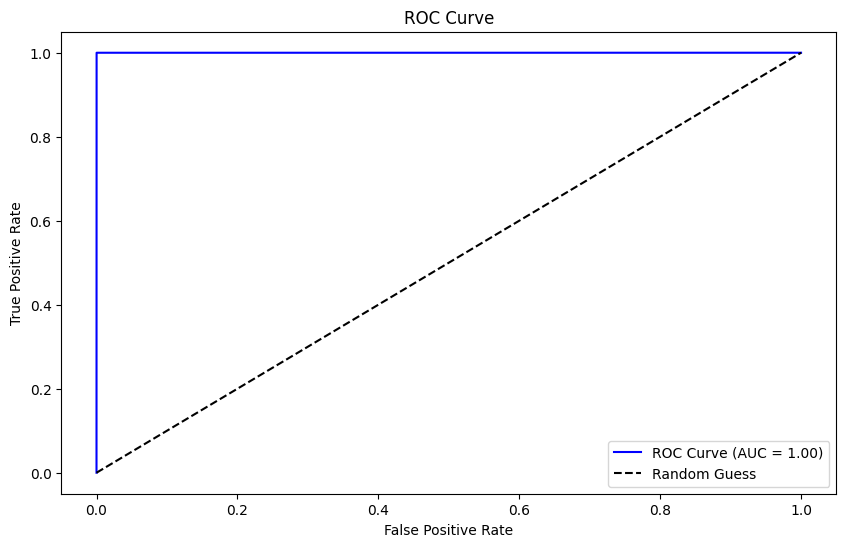

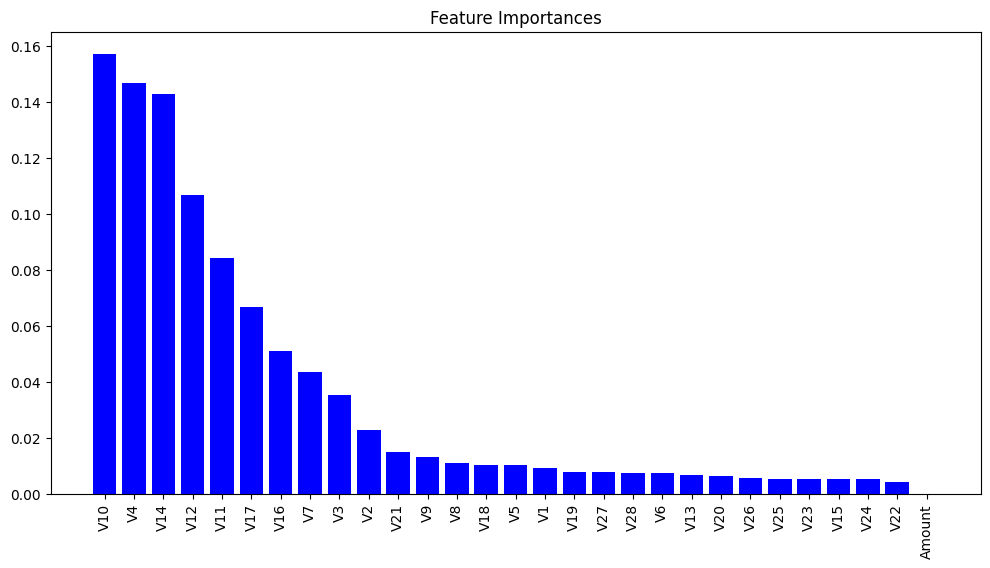

In [13]:

# Build and Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_pred_rf = model.predict(X_test)
y_pred_proba_rf = model.predict_proba(X_test)[:, 1]

# Performance Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'ROC AUC Score: {rf_roc_auc:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance Plot
importances = rf_model.feature_importances_
sorted_features = X_train.columns[np.argsort(importances)[::-1]]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(sorted_features, importances[np.argsort(importances)[::-1]], color='blue')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Save the trained model
model_filename = 'models/RandomForestClassifier.pkl'
joblib.dump(model, model_filename)
print(f'Model saved to {model_filename}')


Model saved to models/RandomForestClassifier.pkl


KNN Accuracy: 0.9976
KNN Precision: 0.9952
KNN Recall: 1.0000
KNN F1 Score: 0.9976
KNN ROC AUC Score: 0.9994

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       1.00      1.00      1.00     56850

    accuracy                           1.00    113699
   macro avg       1.00      1.00      1.00    113699
weighted avg       1.00      1.00      1.00    113699

KNN Confusion Matrix:
 [[56573   276]
 [    2 56848]]


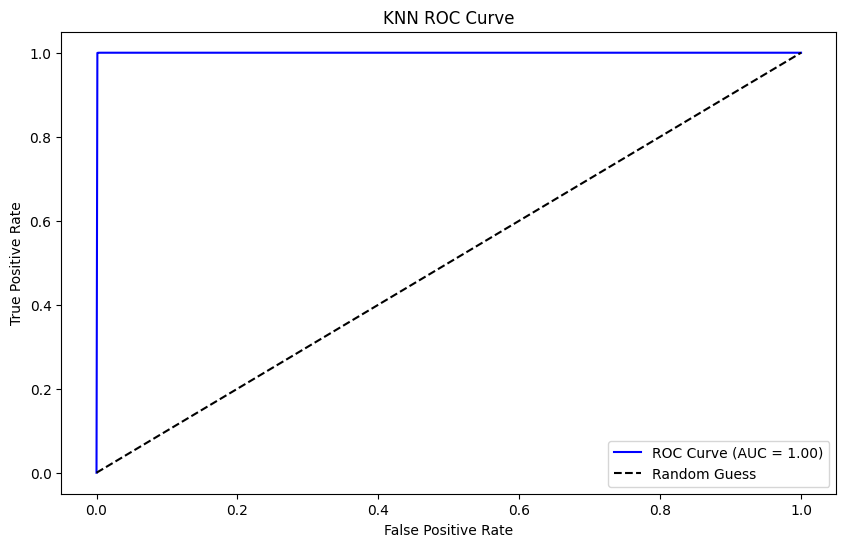

KNN Model saved to models/KNNClassifier.pkl


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Build and Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' for better performance
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Performance Metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f'KNN Accuracy: {knn_accuracy:.4f}')
print(f'KNN Precision: {knn_precision:.4f}')
print(f'KNN Recall: {knn_recall:.4f}')
print(f'KNN F1 Score: {knn_f1:.4f}')
print(f'KNN ROC AUC Score: {knn_roc_auc:.4f}')
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {knn_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()

# Save the trained KNN model
knn_model_filename = 'models/KNNClassifier.pkl'
joblib.dump(knn_model, knn_model_filename)
print(f'KNN Model saved to {knn_model_filename}')


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

In [16]:
# Evaluate on training data
y_train_pred_knn = knn_model.predict(X_train_resampled)
train_accuracy_knn = accuracy_score(y_train_resampled, y_train_pred_knn)

print(f'KNN Training Accuracy: {train_accuracy_knn:.4f}')
print(f'KNN Test Accuracy: {knn_accuracy:.4f}')

KNN Training Accuracy: 0.9983
KNN Test Accuracy: 0.9976


In [17]:
train_precision_knn = precision_score(y_train_resampled, y_train_pred_knn)
train_recall_knn = recall_score(y_train_resampled, y_train_pred_knn)
train_f1_knn = f1_score(y_train_resampled, y_train_pred_knn)

print(f'KNN Training Precision: {train_precision_knn:.4f}')
print(f'KNN Training Recall: {train_recall_knn:.4f}')
print(f'KNN Training F1 Score: {train_f1_knn:.4f}')


KNN Training Precision: 0.9966
KNN Training Recall: 1.0000
KNN Training F1 Score: 0.9983


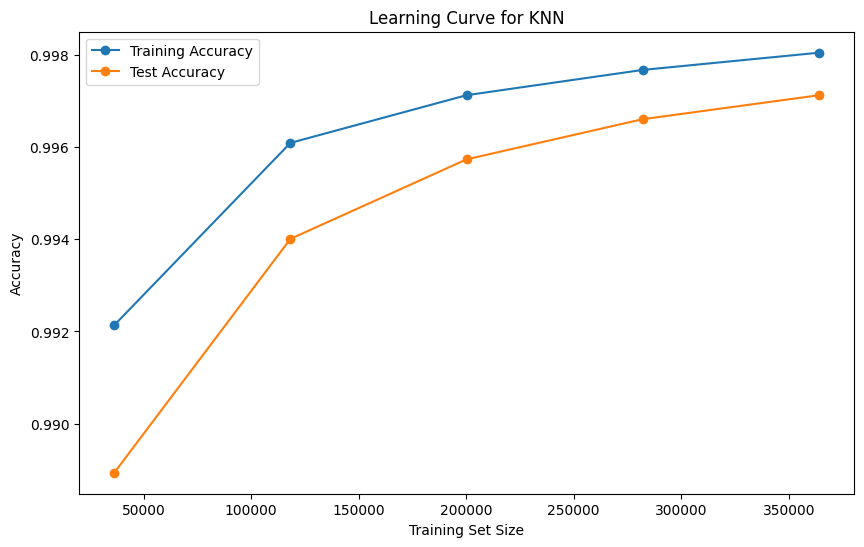

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Test Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN")
plt.legend()
plt.show()